# Inferential Statistical Analysis of the iTunes Podcast Review

During this inferential statistical analysis we want to validate few statements:

1. Most popular category (comedy) podcasts gets best reviews.
2. Bad reviews tend to grow more over crisis years than in economical, social growth time.
3. Reviews length differs significantly per negative and positive ratings.

For these statements we will prepare sample metrics. Form hypothesis. Test them and estimate confidence intervals for the metrics. After received estimates and results we will make conclusions about these statements.

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import os
import itertools
import csv
from datetime import datetime
import statsmodels.api as sm
import math

In [2]:
df = pd.read_csv("/Users/kristinazekiene/Documents/LearningPython/TuringCollege/M2S2/Output/podcasts_reviews_data.csv")
df.info()
df.head(2)

/var/folders/td/b4p1bf2n05z6yjhfwr64xcc80000gn/T/ipykernel_14807/915871229.py:1: DtypeWarning: Columns (0,2,3,4,5,6,7,9,10,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/kristinazekiene/Documents/LearningPython/TuringCollege/M2S2/Output/podcasts_reviews_data.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8835148 entries, 0 to 8835147
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   podcast_id      object 
 1   itunes_id       float64
 2   slug            object 
 3   itunes_url      object 
 4   podcast_title   object 
 5   category        object 
 6   cat_agg         object 
 7   category_fixed  object 
 8   CategoriesNo    float64
 9   review_title    object 
 10  content         object 
 11  rating          float64
 12  author_id       object 
 13  created_at      object 
 14  ReviewDate      object 
dtypes: float64(3), object(12)
memory usage: 1011.1+ MB


,podcast_id,itunes_id,slug,itunes_url,podcast_title,category,cat_agg,category_fixed,CategoriesNo,review_title,content,rating,author_id,created_at,ReviewDate
0,a00018b54eb342567c94dacfb2a3e504,1.313466e+09,scaling-global,https://podcasts.apple.com/us/podcast/scaling-...,Scaling Global,business,business,business,1.0,Very informative,Great variety of speakers!,5.0,CC47C85896D423B,2017-11-29T12:16:43-07:00,2017-11-29
1,a00043d34e734b09246d17dc5d56f63c,1.589735e+08,cornerstone-baptist-church-of-orlando,https://podcasts.apple.com/us/podcast/cornerst...,Cornerstone Baptist Church of Orlando,christianity,"christianity,religion-spirituality",christianity-religion-spirituality,3.0,Good Sernons,I'm a regular listener. I only wish that the ...,5.0,103CC9DA2046218,2019-10-08T04:23:32-07:00,2019-10-08


## Most popular category podcasts gets best reviews

The most reviews got comedy category podcasts, which we saw from Google studio report (https://lookerstudio.google.com/u/0/reporting/5089298a-93a2-4247-b2bf-11c51ae96c97/page/tEnnC). We are curious if the most reviews getting podcast on certain category gets the best ratings, too.

Thus, we will calculate how comedy podcasts distribubes per received rating? We will calculate proportion of 5 star rating reviews in iTunes podcats sample. And estimate comedy podcats 5 star rating posible proportion of confidence interval for comedies podcats population in general.

In [3]:
"""First, lets filter comedy podcasts"""

comedies = (df[df.category_fixed == 'comedy']
                [['podcast_id','podcast_title',
                  'rating', 'author_id']]
                .reset_index())
comedies.head(3)

,index,podcast_id,podcast_title,rating,author_id
0,304,a005cb205faf4fccdf79b198b7a3407d,Can I be Funny?,5.0,15D540B3E68FF75
1,551,a00b8f9cbf11b6694bed1de21128ff5c,Hilarious Headlines,5.0,ED9A0BA35B49AD1
2,552,a00b8f9cbf11b6694bed1de21128ff5c,Hilarious Headlines,5.0,1AB7FD8A006758A


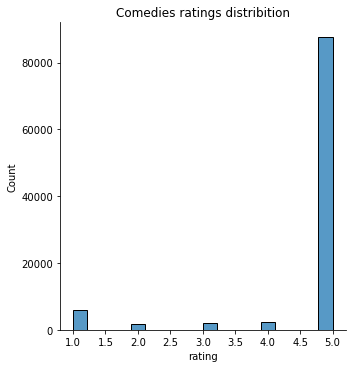

In [4]:
"""Comedy podcats ratings distribution"""
sns.displot(comedies, x='rating').set(title='Comedies ratings distribition')
plt.show()

In [5]:
"""iTunes comedy podcats proportions per ratings"""
comedies_ratings = (comedies.groupby('rating')
                        .agg(NumRatings=('podcast_id','count'))
                        .reset_index())
comedies_ratings['Proportion'] = round(comedies_ratings.NumRatings
                                       /comedies_ratings.NumRatings.sum()
                                       *100
                                       ,1)
comedies_ratings

,rating,NumRatings,Proportion
0,1.0,5944,6.0
1,2.0,1746,1.8
2,3.0,2043,2.0
3,4.0,2343,2.3
4,5.0,87668,87.9


In [6]:
print('Total comedies reviews:', comedies_ratings.NumRatings.sum())
print('# of comedies reviews with 5 star rating:', comedies_ratings.NumRatings[4])

Total comedies reviews: 99744
# of comedies reviews with 5 star rating: 87668


Majority of comedies podcasts gets 5 star ratings (87.9%). 

We want to estimate the confidence interval for population proportion of comedy podcasts getting 5 star rating.

### Proportion confidence interval

In [7]:
tstar = 1.96 # z multiplier, z-score
p = comedies_ratings.NumRatings[4]/ comedies_ratings.NumRatings.sum() # saple proportion
n = comedies_ratings.NumRatings.sum() # sample size

# standart error
se = np.sqrt((p * (1 - p))/n)
se

0.0010328849055836805

In [8]:
lcb = p - tstar * se #lower bound
ucb = p + tstar * se #upper bound

print("Confidence interval:")
(lcb, ucb)

Confidence interval:


(0.8769056065411035, 0.8809545153709916)

In [9]:
print("Confidence interval using statsmodels api function:")
sm.stats.proportion_confint(n * p, n)

Confidence interval using statsmodels api function:


(0.8769056437409285, 0.8809544781711666)

<b>We estimated, with 95% confidence, that the population proportion of comedy podcasts with 5 star ratings might be somewhere between 87.7% and 88.1%.</b>

Which means, that between 87.7% and 88.1% of comedy podcast might have possibility to get very good rating.

## H0: Bad reviews tend to grow more over crisis years than in economical, social growth time

We will want to test hypothesis that during the crisis time (e.g. economical crisis at 2008-2010, covid-19 2020-2023)  bad reviews are increasing in comparison with ecomonical, social growth time (2005-2007, 2011-2019).

For this reason we will prepare data and neccessary attributes:
- Year group of the review
- Sentiment - 2-positive if review was rated by 5, 1-neutral if rated was by 3-4, 0-negative rating if rated was by 1-2
- ReviewLength - Reviews words count

In [30]:
df['Year'] = df.created_at.apply(lambda x: str(x)[0:4])
d = df[df.Year != 'nan'].reset_index()

"""2-positive, 1-neutral, 0-negative rating"""
d['Sentiment'] = np.where(d.rating < 3, 0,
                    np.where(d.rating > 4, 2, 1))

d['NegativeRating'] = np.where(d.rating < 3, 1, 0)

"""Number of words in review"""
d['ReviewLength'] = d.content.apply(lambda x: len(x.split(' ')))

"""Years categorization into growth and crisis groups"""
year_map = {'2005': '_2005_2007_Growth',
            '2006': '_2005_2007_Growth',
            '2007': '_2005_2007_Growth',
            
            '2008': '_2008_2010_Crisis',
            '2009': '_2008_2010_Crisis',
            '2010': '_2008_2010_Crisis',
            
            '2011': '_2011_2019_Growth',
            '2012': '_2011_2019_Growth',
            '2013': '_2011_2019_Growth',
            '2014': '_2011_2019_Growth',
            '2015': '_2011_2019_Growth',
            '2016': '_2011_2019_Growth',
            '2017': '_2011_2019_Growth',
            '2018': '_2011_2019_Growth',
            '2019': '_2011_2019_Growth',
            
            '2020': '_2020_2023_Crisis',
            '2021': '_2020_2023_Crisis',
            '2022': '_2020_2023_Crisis',
            '2023': '_2020_2023_Crisis'
    }

d['Crisis'] = d.Year.apply(lambda x: year_map[x])
d.head(3)

,index,podcast_id,itunes_id,slug,itunes_url,podcast_title,category,cat_agg,category_fixed,CategoriesNo,...,content,rating,author_id,created_at,ReviewDate,Year,Sentiment,NegativeRating,ReviewLength,Crisis
0,0,a00018b54eb342567c94dacfb2a3e504,1.313466e+09,scaling-global,https://podcasts.apple.com/us/podcast/scaling-...,Scaling Global,business,business,business,1.0,...,Great variety of speakers!,5.0,CC47C85896D423B,2017-11-29T12:16:43-07:00,2017-11-29,2017,2,0,4,_2011_2019_Growth
1,1,a00043d34e734b09246d17dc5d56f63c,1.589735e+08,cornerstone-baptist-church-of-orlando,https://podcasts.apple.com/us/podcast/cornerst...,Cornerstone Baptist Church of Orlando,christianity,"christianity,religion-spirituality",christianity-religion-spirituality,3.0,...,I'm a regular listener. I only wish that the ...,5.0,103CC9DA2046218,2019-10-08T04:23:32-07:00,2019-10-08,2019,2,0,26,_2011_2019_Growth
2,2,a00043d34e734b09246d17dc5d56f63c,1.589735e+08,cornerstone-baptist-church-of-orlando,https://podcasts.apple.com/us/podcast/cornerst...,Cornerstone Baptist Church of Orlando,religion-spirituality,"christianity,religion-spirituality",christianity-religion-spirituality,3.0,...,I'm a regular listener. I only wish that the ...,5.0,103CC9DA2046218,2019-10-08T04:23:32-07:00,2019-10-08,2019,2,0,26,_2011_2019_Growth


Lets count few metrics describing number of reviews, avg.rating, avg. review length, number of negative ratings and percent of negative ratings over the year groups per podcasts categories

In [50]:
reviews_info = (d.groupby(['Crisis','category_fixed'])
                    .agg(NumOfReviews=('podcast_id','count'),
                         NumOfPodcasts=('podcast_id','nunique'),
                         AvgRating=('rating','mean'),
                        AvgRevLength=('ReviewLength','mean'),
                        NumOfBadRatings=('NegativeRating','sum'))
                    .reset_index()
                   )
reviews_info['PercentBad'] = round(reviews_info.NumOfBadRatings/reviews_info.NumOfReviews*100,1)
reviews_info

,Crisis,category_fixed,NumOfReviews,NumOfPodcasts,AvgRating,AvgRevLength,NumOfBadRatings,PercentBad
0,_2005_2007_Growth,after-film-reviews-shows-tv,12,1,4.750000,29.500000,0,0.0
1,_2005_2007_Growth,alternative-education-fitness-health-improveme...,378,2,4.761905,64.476190,12,3.2
2,_2005_2007_Growth,alternative-education-fitness-health-improveme...,100,1,4.800000,39.840000,4,4.0
3,_2005_2007_Growth,alternative-family-fitness-health-kids,3,1,5.000000,78.000000,0,0.0
4,_2005_2007_Growth,alternative-fitness-health-natural-science-sci...,12,1,4.000000,93.666667,4,33.3
...,...,...,...,...,...,...,...,...
6848,_2020_2023_Crisis,sports-tennis,412,26,4.601942,46.550971,31,7.5
6849,_2020_2023_Crisis,sports-volleyball,96,10,4.947917,34.052083,1,1.0
6850,_2020_2023_Crisis,sports-wilderness,12141,241,4.790709,38.792851,531,4.4
6851,_2020_2023_Crisis,sports-wrestling,4635,274,4.433225,38.647249,600,12.9


In [107]:
df_crisis = pd.pivot_table(reviews_info, 
                          values=['NumOfReviews','AvgRating','AvgRevLength','PercentBad','NumOfPodcasts'],
                          index=['category_fixed'],
                          columns=['Crisis'],
                          aggfunc=np.sum)

"""Flatten pivot table column names"""
df_crisis.columns = df_crisis.columns.to_series().str.join('_')

df_crisis['DiffBadPropCrisis'] = df_crisis.PercentBad__2020_2023_Crisis - df_crisis.PercentBad__2011_2019_Growth
df_crisis['DiffAvgRatingCrisis'] = df_crisis.AvgRating__2020_2023_Crisis - df_crisis.AvgRating__2011_2019_Growth
df_crisis['DiffAvgRavLenCrisis'] = df_crisis.AvgRevLength__2020_2023_Crisis - df_crisis.AvgRevLength__2011_2019_Growth

df_crisis.info()
df_crisis.head(4)

<class 'pandas.core.frame.DataFrame'>
Index: 3621 entries, after-animation-comedy-film-leisure-manga-shows-tv to technology
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   AvgRating__2005_2007_Growth      311 non-null    float64
 1   AvgRating__2008_2010_Crisis      535 non-null    float64
 2   AvgRating__2011_2019_Growth      2918 non-null   float64
 3   AvgRating__2020_2023_Crisis      3089 non-null   float64
 4   AvgRevLength__2005_2007_Growth   311 non-null    float64
 5   AvgRevLength__2008_2010_Crisis   535 non-null    float64
 6   AvgRevLength__2011_2019_Growth   2918 non-null   float64
 7   AvgRevLength__2020_2023_Crisis   3089 non-null   float64
 8   NumOfPodcasts__2005_2007_Growth  311 non-null    float64
 9   NumOfPodcasts__2008_2010_Crisis  535 non-null    float64
 10  NumOfPodcasts__2011_2019_Growth  2918 non-null   float64
 11  NumOfPodcasts__2020_2023_Crisis 

,AvgRating__2005_2007_Growth,AvgRating__2008_2010_Crisis,AvgRating__2011_2019_Growth,AvgRating__2020_2023_Crisis,AvgRevLength__2005_2007_Growth,AvgRevLength__2008_2010_Crisis,AvgRevLength__2011_2019_Growth,AvgRevLength__2020_2023_Crisis,NumOfPodcasts__2005_2007_Growth,NumOfPodcasts__2008_2010_Crisis,...,NumOfReviews__2008_2010_Crisis,NumOfReviews__2011_2019_Growth,NumOfReviews__2020_2023_Crisis,PercentBad__2005_2007_Growth,PercentBad__2008_2010_Crisis,PercentBad__2011_2019_Growth,PercentBad__2020_2023_Crisis,DiffBadPropCrisis,DiffAvgRatingCrisis,DiffAvgRavLenCrisis
category_fixed,,,,,,,,,,,,,,,,,,,,,
after-animation-comedy-film-leisure-manga-shows-tv,NaN,NaN,5.000000,5.000000,NaN,NaN,65.000000,32.750000,NaN,NaN,...,NaN,135.0,20.0,NaN,NaN,0.0,0.0,0.0,0.000000,-32.250000
after-animation-film-leisure-manga-shows-tv,NaN,NaN,5.000000,4.782609,NaN,NaN,47.250000,19.000000,NaN,NaN,...,NaN,32.0,92.0,NaN,NaN,0.0,0.0,0.0,-0.217391,-28.250000
after-arts-books-film-shows-tv,NaN,NaN,4.642643,4.619048,NaN,NaN,67.234234,40.142857,NaN,NaN,...,NaN,1332.0,84.0,NaN,NaN,7.5,9.5,2.0,-0.023595,-27.091377
after-arts-comedy-film-food-shows-tv,NaN,NaN,5.000000,4.971429,NaN,NaN,26.416667,29.857143,NaN,NaN,...,NaN,120.0,175.0,NaN,NaN,0.0,0.0,0.0,-0.028571,3.440476


We will filter these categories which has more than 100 reviews and more than 10 podcasts over 2011-2019 and 2020 - 2023

In [108]:
df_crisis = df_crisis[(df_crisis.NumOfReviews__2011_2019_Growth >= 100)
                      &
                      (df_crisis.NumOfReviews__2020_2023_Crisis >= 100)
                      &
                      (df_crisis.NumOfPodcasts__2011_2019_Growth >= 10)
                      & 
                      (df_crisis.NumOfPodcasts__2020_2023_Crisis >= 10)].reset_index()

print("Number of categories with 100+ reviews:",len(df_crisis.NumOfReviews__2020_2023_Crisis))

Number of categories with 100+ reviews: 403


In [109]:
df_crisis[['DiffBadPropCrisis','DiffAvgRatingCrisis']].describe()

,DiffBadPropCrisis,DiffAvgRatingCrisis
count,403.000000,403.000000
mean,2.128536,-0.087616
std,4.328800,0.184237
min,-12.200000,-0.839080
25%,-0.200000,-0.176165
50%,1.300000,-0.056834
75%,3.850000,0.014898
max,20.800000,0.541335


- We can see that Proportion of Bad reviews compared the growth years 2011-2019 and crisis years 2020 - 2023 increased. Avg. difference in percentage points were 2.1, then median 1.3.

- Avg. rating metrics all statistics are negative, wich means that avg. rating also decreased per all categories.

We want to check whether the this negative reviews proportion increase and avg. rating decrease is significant. For this reason we will raise two hypotesis:

<b>Negative ratings proportions:</b>

<b>H0: Negative ratings proportion difference means between Growth and Crisis period is equal. </b> (μ1=μ2)
 

H1: Negative ratings proportion difference means between Growth and Crisis period is significant different from 0. (μ1≠μ2)

<b>Avg. ratings:</b>

<b>H0: Avg. rating difference means between Growth and Crisis period is equal. </b> (μ1=μ2)

H1: Avg. rating difference means between Growth and Crisis period is significant different from 0. (μ1≠μ2)

/Users/kristinazekiene/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


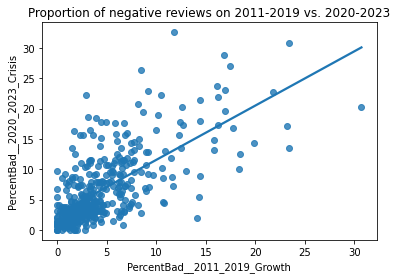

In [110]:
"""Scatter plot categories proportions of bad ratings"""
(sns.regplot(df_crisis.PercentBad__2011_2019_Growth,
            df_crisis.PercentBad__2020_2023_Crisis, ci=None)
     .set(title='Proportion of negative reviews on 2011-2019 vs. 2020-2023'))
plt.show()

/Users/kristinazekiene/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


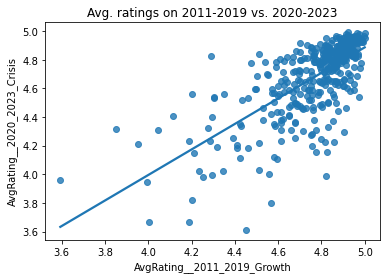

In [111]:
"""Scatter plot categories avg. ratings"""
(sns.regplot(df_crisis.AvgRating__2011_2019_Growth,
            df_crisis.AvgRating__2020_2023_Crisis, ci=None)
     .set(title='Avg. ratings on 2011-2019 vs. 2020-2023'))
plt.show()

### H0: On negative ratings proportion

We will test for the significant mean difference in negative ratings proportion per year groups at 5% significance level

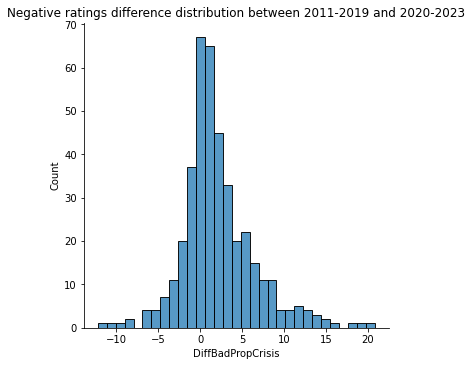

In [112]:
(sns.displot(df_crisis, x="DiffBadPropCrisis")
    .set(title='Negative ratings difference distribution between 2011-2019 and 2020-2023'))
plt.show()

Negative ratings difference distribution is very similar to normal distribution.

In [113]:
n1 = len(df_crisis.PercentBad__2011_2019_Growth) # sample size
mu1 = df_crisis['PercentBad__2011_2019_Growth'].mean() # mean
sd1 = df_crisis['PercentBad__2011_2019_Growth'].std() # standart error

(n1, mu1, sd1)

(403, 4.56699751861042, 4.477142353024702)

In [114]:
n2 = len(df_crisis.PercentBad__2020_2023_Crisis) # sample size
mu2 = df_crisis['PercentBad__2020_2023_Crisis'].mean() # mean
sd2 = df_crisis['PercentBad__2020_2023_Crisis'].std() # standart error

(n2, mu2, sd2)

(403, 6.695533498759306, 5.883658954027491)

In [115]:
# Difference in Population Means hypothesis testing
sm.stats.ztest(df_crisis.PercentBad__2011_2019_Growth, df_crisis.PercentBad__2020_2023_Crisis)

(-5.779493522700953, 7.492583867848599e-09)

<b> Conclusion</b>:
The first value is the test-statistic and second is p-value.
We can see that p-value < 0.05. Thus, we reject H0 hyppthesis, and conclude that negative ratings proportion difference means between Growth and Crisis period is significant different from 0.

We can interpret that proportions between growth 2011-2019 and crisis years 2020 - 2023 differs. 

#### Confidence interval of negative rating proportion difference

In [116]:
diff_mu1 = df_crisis['DiffBadPropCrisis'].mean()
diff_sd1 = df_crisis['DiffBadPropCrisis'].std()
diff_n = len(df_crisis['DiffBadPropCrisis'])

t_stat = (diff_mu1/(diff_sd1/math.sqrt(diff_n)))
t_stat

9.871109462170349

In [117]:
lbc = diff_mu1 - t_stat*(diff_sd1/math.sqrt(diff_n))
ubc = diff_mu1 + t_stat*(diff_sd1/math.sqrt(diff_n))
print("95% confidence interval of negative rating proportion difference:")
(lbc,ubc)

95% confidence interval of negative rating proportion difference:


(0.0, 4.257071960297765)

We can see that negative rating proportion difference between growth and crisis years might vary from 0 to 4.3 percentage points.

### H0: On Avg. rating difference

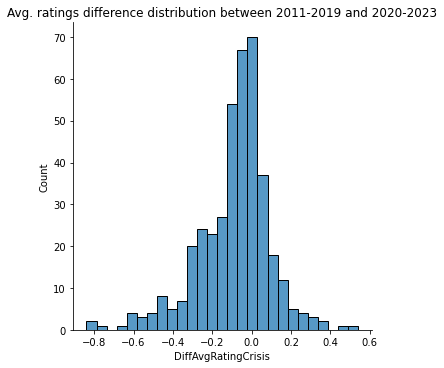

In [118]:
(sns.displot(df_crisis, x="DiffAvgRatingCrisis")
    .set(title='Avg. ratings difference distribution between 2011-2019 and 2020-2023'))
plt.show()

Avg. ratings difference distribution is very similar to normal distribution.

In [119]:
n1 = len(df_crisis.AvgRating__2011_2019_Growth) # sample size
mu1 = df_crisis['AvgRating__2011_2019_Growth'].mean() # mean
sd1 = df_crisis['AvgRating__2011_2019_Growth'].std() # standart error

(n1, mu1, sd1)

(403, 4.767569036368404, 0.20396847735255372)

In [120]:
n2 = len(df_crisis.AvgRating__2020_2023_Crisis) # sample size
mu2 = df_crisis['AvgRating__2020_2023_Crisis'].mean() # mean
sd2 = df_crisis['AvgRating__2020_2023_Crisis'].std() # standart error

(n2, mu2, sd2)

(403, 4.679952835875355, 0.2578602040184327)

In [121]:
# Difference in Population Means hypothesis testing
sm.stats.ztest(df_crisis.AvgRating__2011_2019_Growth, df_crisis.AvgRating__2020_2023_Crisis)

(5.349757382199777, 8.807222255971272e-08)

<b> Conclusion</b>:
We can see that p-value < 0.05. Thus, we reject H0 hyppthesis, and conclude that avg. rating difference means between Growth and Crisis period is significant different from 0.

We can interpret that avg. rating between growth 2011-2019 and crisis years 2020 - 2023 differs. 

#### Confidence interval of avg. rating difference

In [122]:
diff_mu1 = df_crisis['DiffAvgRatingCrisis'].mean()
diff_sd1 = df_crisis['DiffAvgRatingCrisis'].std()
diff_n = len(df_crisis['DiffAvgRatingCrisis'])

t_stat = (diff_mu1/(diff_sd1/math.sqrt(diff_n)))
t_stat

-9.546830899593763

In [123]:
lbc = diff_mu1 - t_stat*(diff_sd1/math.sqrt(diff_n))
ubc = diff_mu1 + t_stat*(diff_sd1/math.sqrt(diff_n))
print("95% confidence interval of avg. rating difference:")
(lbc,ubc)

95% confidence interval of avg. rating difference:


(0.0, -0.17523240098608878)

We can see that avg. rating difference between growth and crisis years might vary from 0 to -0.18 points

<b> After testing both hypothesis either negative ratings proportions differ or avg. rating differ between growth and crisis years we rejected NULL hyppthesis and conculed that difference is significant. Thus, we might state that bad reviews tend to grow more over crisis years than in economical, social growth time.</b>

## H0: Reviews length differs significantly per negative and positive ratings

We want to check whether the negative ratings reviews has more words on avg. and this difference is significant. For this reason we will raise hypotesis:

<b>H0: Reviews words number difference means between Negative and Positive ratings is equal.</b> (μ1=μ2)

H1: Reviews words number difference means between Negative and Positive ratings is significant different from 0. (μ1≠μ2)

In [128]:
reviews_info = (d.groupby(['Sentiment','category_fixed'])
                    .agg(NumOfReviews=('podcast_id','count'),
                         NumOfPodcasts=('podcast_id','nunique'),
                        AvgRevLength=('ReviewLength','mean'))
                    .reset_index()
                   )

sentiment_map = {0: "Negative",
                 1: "Neutral",
                 2: "Positive"
                }
            
reviews_info['Sentiment'] = reviews_info.Sentiment.apply(lambda x: sentiment_map[x])
reviews_info.head(4)

,Sentiment,category_fixed,NumOfReviews,NumOfPodcasts,AvgRevLength
0,Negative,after-arts-books-film-shows-tv,108,2,110.222222
1,Negative,after-arts-culture-film-shows-society-tv,4,1,37.000000
2,Negative,after-arts-design-film-shows-tv,4,1,12.000000
3,Negative,after-arts-film-performing-reviews-shows-tv,25,1,40.000000


In [135]:
df_reviews = pd.pivot_table(reviews_info, 
                          values=['NumOfReviews','AvgRevLength','NumOfPodcasts'],
                          index=['category_fixed'],
                          columns=['Sentiment'],
                          aggfunc=np.sum)

"""Flatten pivot table column names"""
df_reviews.columns = df_reviews.columns.to_series().str.join('_')
df_reviews
df_reviews['DiffWordNumNegative'] = df_reviews.AvgRevLength_Negative - df_reviews.AvgRevLength_Positive

df_reviews.info()
df_reviews.head(4)

<class 'pandas.core.frame.DataFrame'>
Index: 3621 entries, after-animation-comedy-film-leisure-manga-shows-tv to technology
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AvgRevLength_Negative   1641 non-null   float64
 1   AvgRevLength_Neutral    1827 non-null   float64
 2   AvgRevLength_Positive   3599 non-null   float64
 3   NumOfPodcasts_Negative  1641 non-null   float64
 4   NumOfPodcasts_Neutral   1827 non-null   float64
 5   NumOfPodcasts_Positive  3599 non-null   float64
 6   NumOfReviews_Negative   1641 non-null   float64
 7   NumOfReviews_Neutral    1827 non-null   float64
 8   NumOfReviews_Positive   3599 non-null   float64
 9   DiffWordNumNegative     1628 non-null   float64
dtypes: float64(10)
memory usage: 311.2+ KB


,AvgRevLength_Negative,AvgRevLength_Neutral,AvgRevLength_Positive,NumOfPodcasts_Negative,NumOfPodcasts_Neutral,NumOfPodcasts_Positive,NumOfReviews_Negative,NumOfReviews_Neutral,NumOfReviews_Positive,DiffWordNumNegative
category_fixed,,,,,,,,,,
after-animation-comedy-film-leisure-manga-shows-tv,NaN,NaN,60.838710,NaN,NaN,1.0,NaN,NaN,155.0,NaN
after-animation-film-leisure-manga-shows-tv,NaN,15.00,28.461538,NaN,3.0,3.0,NaN,20.0,104.0,NaN
after-arts-books-film-shows-tv,110.222222,102.65,59.293160,2.0,2.0,4.0,108.0,80.0,1228.0,50.929063
after-arts-comedy-film-food-shows-tv,NaN,7.00,28.827586,NaN,1.0,1.0,NaN,5.0,290.0,NaN


In [136]:
df_reviews = df_reviews[(df_reviews.NumOfReviews_Negative >= 100)
                      &
                      (df_reviews.NumOfReviews_Positive >= 100)
                      &
                      (df_reviews.NumOfPodcasts_Negative >= 10)
                      & 
                      (df_reviews.NumOfPodcasts_Positive >= 10)].reset_index()

print("Number of categories with 100+ reviews:",len(df_reviews.NumOfReviews_Negative))

Number of categories with 100+ reviews: 197


In [137]:
df_reviews.DiffWordNumNegative.describe()

count    197.000000
mean      13.482680
std        8.335478
min       -7.982373
25%        8.402251
50%       14.112658
75%       17.374153
max       40.515180
Name: DiffWordNumNegative, dtype: float64

From Word number difference between negative and positive ratings statistics, we see that mean, median and 25th and higher percentiles is positive. This means that more words are counted on negative ratings per different podcasts categories.

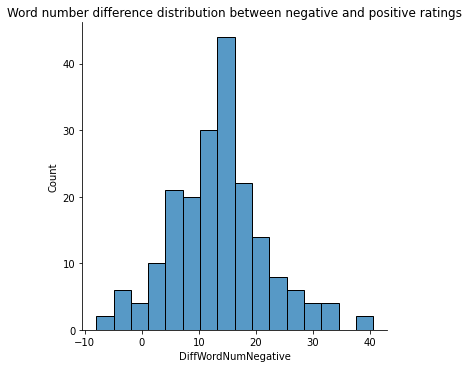

In [138]:
(sns.displot(df_reviews, x="DiffWordNumNegative")
    .set(title='Word number difference distribution between negative and positive ratings'))
plt.show()

We can see that distribution of differences is normal distribution

### H0: On reviews words number

In [139]:
n1 = len(df_reviews.AvgRevLength_Negative) # sample size
mu1 = df_reviews['AvgRevLength_Negative'].mean() # mean
sd1 = df_reviews['AvgRevLength_Negative'].std() # standart error

(n1, mu1, sd1)

(197, 54.4825865260381, 10.092474605858666)

In [142]:
n2 = len(df_reviews.AvgRevLength_Positive) # sample size
mu2 = df_reviews['AvgRevLength_Positive'].mean() # mean
sd2 = df_reviews['AvgRevLength_Positive'].std() # standart error

(n2, mu2, sd2)

(197, 40.99990670616294, 5.869932586896205)

In [143]:
# Difference in Population Means hypothesis testing
sm.stats.ztest(df_reviews.AvgRevLength_Negative, df_reviews.AvgRevLength_Positive)

(16.2083520389198, 4.402152605205053e-59)

<b> Conclusion</b>:
We can see that p-value < 0.05. Thus, we reject H0 hyppthesis, and conclude that avg. word number difference difference means between negative and positive ratings is significant different from 0.

We can interpret that avg. word number between negative and positive ratings differs. 

### Confidence interval of avg. rating difference

In [144]:
diff_mu1 = df_reviews['DiffWordNumNegative'].mean()
diff_sd1 = df_reviews['DiffWordNumNegative'].std()
diff_n = len(df_reviews['DiffWordNumNegative'])

t_stat = (diff_mu1/(diff_sd1/math.sqrt(diff_n)))
t_stat

22.70276784405003

In [145]:
lbc = diff_mu1 - t_stat*(diff_sd1/math.sqrt(diff_n))
ubc = diff_mu1 + t_stat*(diff_sd1/math.sqrt(diff_n))
print("95% confidence interval of avg. word number difference:")
(lbc,ubc)

95% confidence interval of avg. word number difference:


(1.7763568394002505e-15, 26.96535963975039)

We can see that avg. word number difference between negative and positive reviews might vary from 0 to 27 words.

## Conclusions

After statistical inferential analysis we found that:
- Comedy podcast might have possibility to get very good rating. We estimated, with 95% confidence, that the population proportion of comedy podcasts with 5 star ratings might be somewhere between 87.7% and 88.1%.
- Proportion of Bad reviews compared with growth years 2011-2019 and crisis years 2020 - 2023 increased. As well as avg. rating also decreased per all categories on crisis years.
- After testing hypothesis whether negative ratings proportions differ and avg. rating differ between growth and crisis years, we rejected NULL hypothesis and concluded that difference is significant. Thus, we might state that bad reviews tend to grow more over crisis years than in economical, social growth time.
- Users might leave longer negative reviews. We have made such conclusion after testing hypothesis that reviews length differs significantly per neagtive and positive ratings.